In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nf=pd.read_csv("netflix_titles.csv")

In [3]:
nf.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [4]:
nf.shape

(8807, 12)

In [5]:
nf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
nf.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [8]:
nf['director'].fillna('Unknown', inplace=True)
nf['cast'].fillna('Unknown', inplace=True)
nf['country'].fillna('Unknown', inplace=True)
# Filled missing 'director', 'cast', and 'country' values with 'Unknown'.

/tmp/ipython-input-1948429210.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nf['director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-1948429210.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [9]:
nf.dropna(subset=["date_added", "rating", "duration"], inplace=True)
# Dropped rows with missing 'date_added', 'rating', or 'duration'

In [10]:
nf.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [11]:
nf['date_added'] = pd.to_datetime(nf['date_added'].str.strip())
# 'date_added' column has been converted to datetime format

In [12]:
nf.drop_duplicates(inplace=True)
# Removed duplicate rows.

In [13]:
nf.shape

(8790, 12)

In [14]:
nf.to_csv("NF_clean.csv", index=False)

In [15]:
df=pd.read_csv("NF_clean.csv")

/tmp/ipython-input-3954233418.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='type', data=df, palette='pastel')


Text(0, 0.5, 'Count')

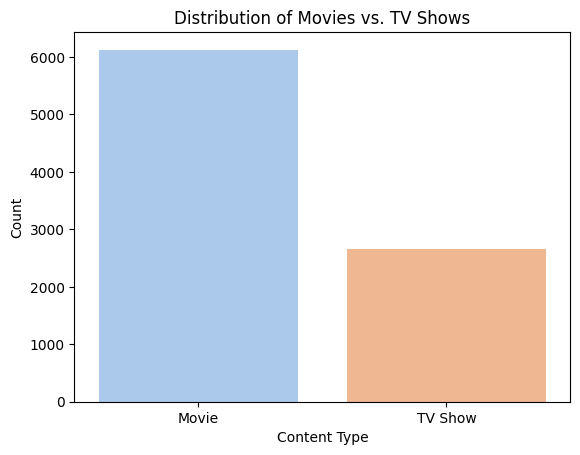

In [16]:
# Analyzing Content Type Distribution...
plt.figure()
ax = sns.countplot(x='type', data=df, palette='pastel')
plt.title('Distribution of Movies vs. TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Count')

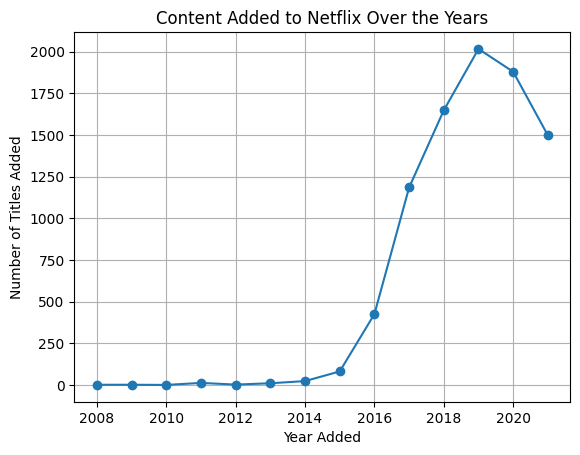

In [17]:
# Content Added Over Time
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
content_by_year = df['year_added'].value_counts().sort_index()
content_by_year.plot(kind='line', marker='o')
plt.title('Content Added to Netflix Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.grid(True)

/tmp/ipython-input-178904936.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_countries.index, x=top_10_countries.values, palette='viridis')


Text(0, 0.5, 'Country')

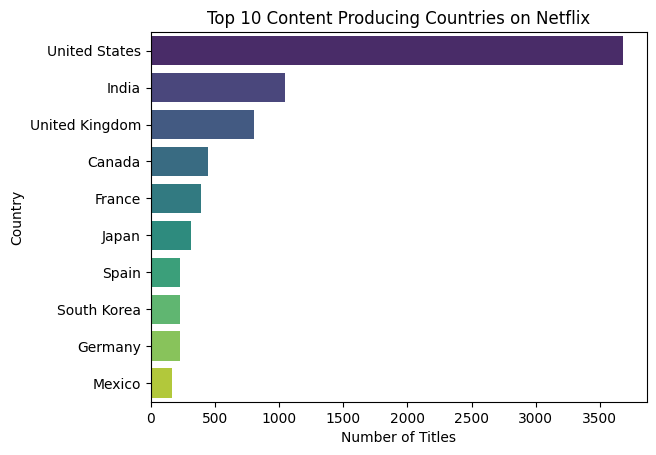

In [18]:
# Analyzing Top 10 Countries...
known_countries_df = df[df['country'] != 'Unknown']
country_list = known_countries_df['country'].str.split(', ').explode()
top_10_countries = country_list.value_counts().head(10)
sns.barplot(y=top_10_countries.index, x=top_10_countries.values, palette='viridis')
plt.title('Top 10 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')

/tmp/ipython-input-4125290795.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_15_genres.index, x=top_15_genres.values, palette='mako')


Text(0, 0.5, 'Genre')

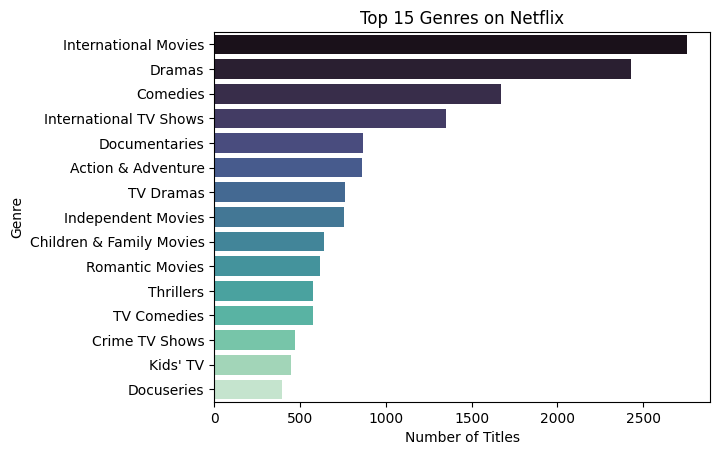

In [19]:
# Top 15 Genres
genre_list = df['listed_in'].str.split(', ').explode()
top_15_genres = genre_list.value_counts().head(15)
sns.barplot(y=top_15_genres.index, x=top_15_genres.values, palette='mako')
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')

/tmp/ipython-input-84946006.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='rocket')


Text(0, 0.5, 'Rating')

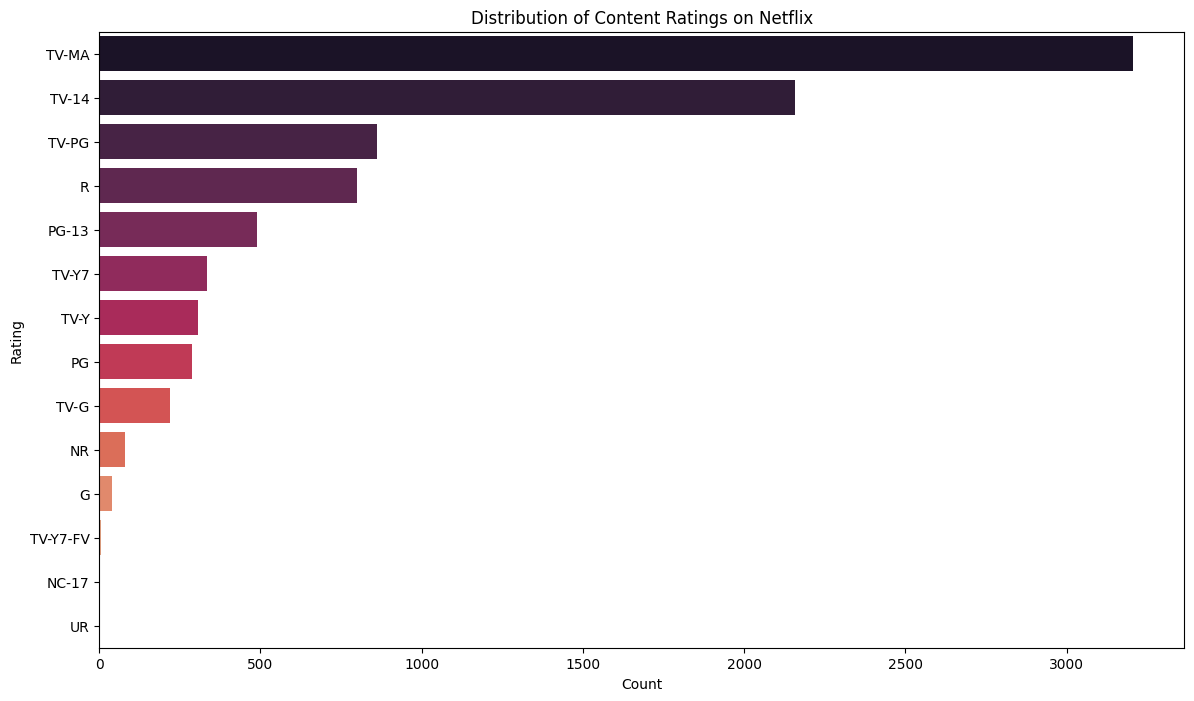

In [20]:
# Analyzing Distribution of Content Ratings...
plt.figure(figsize=(14, 8))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='rocket')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')

Text(0, 0.5, 'Frequency')

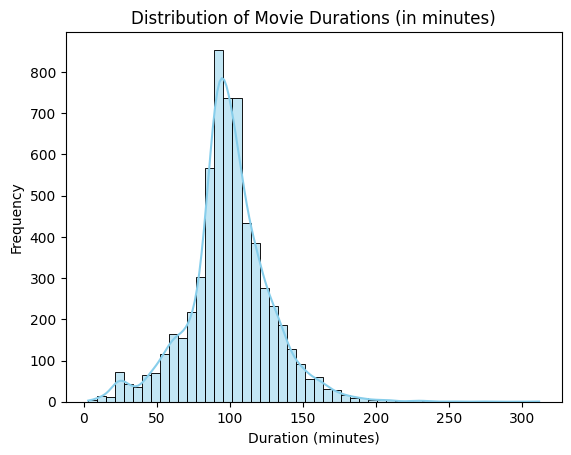

In [21]:
# Analyzing Content Duration...
movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)
sns.histplot(movies_df['duration_min'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

/tmp/ipython-input-2293278152.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='duration', data=tv_shows_df, order=tv_shows_df['duration'].value_counts().index, palette='crest')


Text(0, 0.5, 'Number of Seasons')

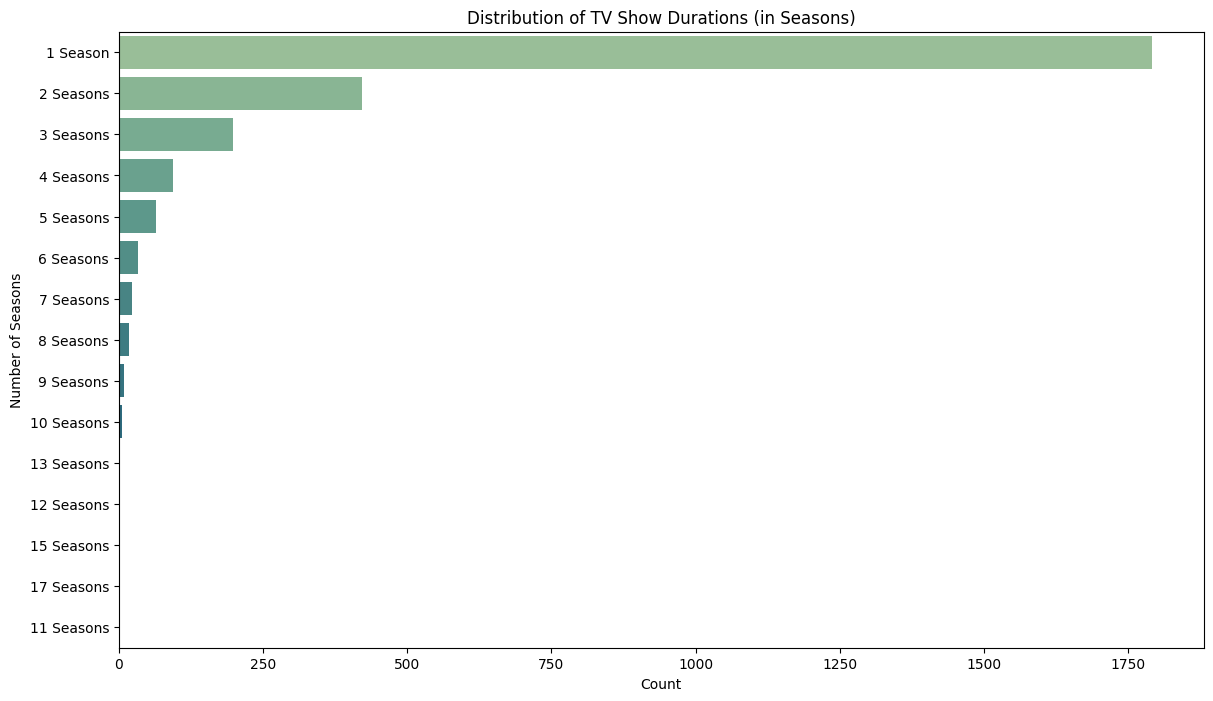

In [22]:
# TV Show duration analysis
plt.figure(figsize=(14, 8))
sns.countplot(y='duration', data=tv_shows_df, order=tv_shows_df['duration'].value_counts().index, palette='crest')
plt.title('Distribution of TV Show Durations (in Seasons)')
plt.xlabel('Count')
plt.ylabel('Number of Seasons')

# **ML Models**

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [25]:
movies_df = df[df['type'] == 'Movie'].copy()
movies_df.reset_index(drop=True, inplace=True)

movies_df['soup'] = (movies_df['listed_in'] + ' ' + movies_df['director'] + ' ' +  movies_df['cast'] + ' ' +  movies_df['title'] + ' ' +
        movies_df['description'])

movies_df['soup'] = movies_df['soup'].fillna('')
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_df['soup'])

cosine_sim_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)

title_indices = pd.Series(movies_df.index, index=movies_df['title']).drop_duplicates()

In [26]:
test_movie_title_1 = "Zombieland"

idx = title_indices[test_movie_title_1]
sim_scores = list(enumerate(cosine_sim_matrix[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:11]
movie_indices = [i[0] for i in sim_scores]
recommended_movies = movies_df['title'].iloc[movie_indices]
for i, movie in enumerate(recommended_movies):
     print(f"{i+1}. {movie}")

1. 30 Minutes or Less
2. Kingpin
3. Night Moves
4. THE RUM DIARY
5. The End of the Tour
6. 3 Days to Kill
7. No Reservations
8. Santa Girl
9. 2012
10. Our Idiot Brother


In [27]:
test_movie_title_2 = "The Social Network"

idx_2 = title_indices[test_movie_title_2]
sim_scores_2 = list(enumerate(cosine_sim_matrix[idx_2]))
sim_scores_2 = sorted(sim_scores_2, key=lambda x: x[1], reverse=True)
sim_scores_2 = sim_scores_2[1:11]
movie_indices_2 = [i[0] for i in sim_scores_2]

recommended_movies_2 = movies_df['title'].iloc[movie_indices_2]
for i, movie in enumerate(recommended_movies_2):
    print(f"{i+1}. {movie}")

1. Justin Timberlake + the Tennessee Kids
2. Zodiac
3. Rebecca
4. The End of the Tour
5. Panic Room
6. Garfield's Fun Fest
7. The Game
8. The Squid and the Whale
9. The Girl with the Dragon Tattoo
10. David Batra: Elefanten i rummet
